K Nearest Neighbors Classifier

In [1]:
#Importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#Importing Logistic Regression from Sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from collections import Counter

In [8]:
#Creating Dummy Data

from sklearn.datasets.samples_generator import make_blobs

def fcnCreateDatasets(intSamples):
    X, y = make_blobs(n_samples = intSamples, centers = 2, n_features = 2, cluster_std = 5, random_state = 15)
    return X, y

In [32]:
#Creating the functions for KNN and Euclidean Distance

def fcnCalculateEuclideanDistance(X1, X2):
    return np.sqrt(np.sum((X1 - X2) ** 2))

def fcnApplyKNNClassifier(X, y, X_test, intK = 5):
    if len(X_test.shape) == 1:
        X_test = X_test[:,np.newaxis]
    if len(X.shape) == 1:
        X = X[:,np.newaxis]
    yPredicted = np.zeros(len(X_test))    
    yConfidence = np.zeros(len(X_test))
    for intSample in range(0,len(X_test)):
        xtest_sample = X_test[intSample]
        distance = np.zeros(len(X))
        for intCtr in range(0,X.shape[0]):
            xtrain_sample = X[intCtr]
            distance[intCtr] = fcnCalculateEuclideanDistance(xtest_sample, xtrain_sample)
            indexes = np.argsort(distance)[:intK]
            yclasses = [ y[intIndex] for intIndex in indexes ]
            votedClass = Counter(yclasses).most_common(1)
        yPredicted[intSample] = votedClass[0][0] 
        yConfidence[intSample] = votedClass[0][1] / intK
    
    return yPredicted, yConfidence

def fcnCalculateAccuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [35]:
#Test the KNN Classifier on dummy dataset

x, y = fcnCreateDatasets(200)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

y_pred, y_conf = fcnApplyKNNClassifier(x_train, y_train, x_test, 5)

accuracy = fcnCalculateAccuracy(y_pred, y_test)

In [36]:
accuracy

0.94

In [48]:
#Confusion Matrix 

cm = metrics.confusion_matrix(y_test, y_pred)

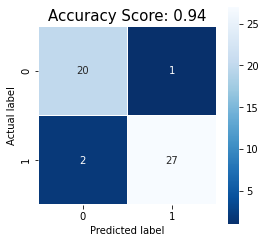

In [50]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

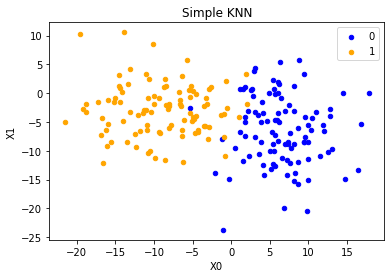

In [51]:
#Plotting the dataset

df = pd.DataFrame(dict(x = x[:,0], y = x[:,1], label = y.reshape(-1)))
colors = {0 : 'blue', 1 : 'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Simple KNN")
plt.show()

In [63]:
#Working on Breast Cancer Dataset for comparison

from sklearn import datasets

data = datasets.load_breast_cancer()
X = data['data']
Y = data['target']
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [85]:
Y_pred, Y_conf = fcnApplyKNNClassifier(X_train, Y_train, X_test, 5)
Accuracy = fcnCalculateAccuracy(Y_pred, Y_test)

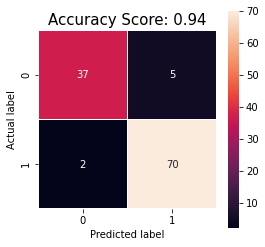

In [86]:
cm_bc = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm_bc, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(Accuracy, 2))
plt.title(all_sample_title, size = 15);

In [87]:
KNNClf = KNeighborsClassifier(n_neighbors = 5)
KNNClf.fit(X_train, Y_train)
Y_Pred = KNNClf.predict(X_test)

In [88]:
metrics.accuracy_score(Y_test, Y_Pred)

0.9385964912280702